### Importing Modules and Reading data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\rahul\Documents\EDA\water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Data cleaning

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There are 9 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


From the above table, we can see that the count of each feature are not same. so there must me some null values.
Feature Solids has the high mean and standard deviation compared to other feature. so the distribution must be high.
However,It is for overall population. 
checking the same for 2 samples based on Portability feature

Check for missing values

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Features ph, Sulfate and Trihalomethanes are having null values. we shouldn't remove all null data because if we remove then most of our data will be lost.

Filling null values

Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes

In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


### Exploratory Data Analysis

In [15]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### checking if we need to do dimensionality reduction or not

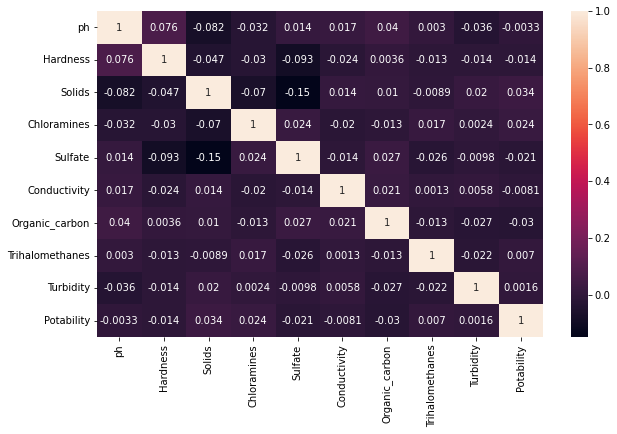

In [25]:
sns.heatmap(df.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,6)


All the feature are independent and doesn't share any linear relationship.\. so dimenstionality reduction doesn't make any change

#### outlier detection

<AxesSubplot:>

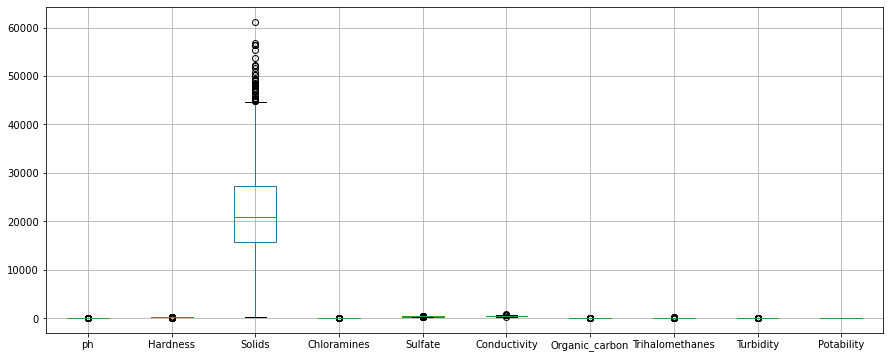

In [27]:
df.boxplot(figsize=(15,6))

In [30]:
df['Solids']

0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3276, dtype: float64

Not removing the outliers because they might be important to decide the quality of the water

#### Checking the data balance 

Biased or unbiased

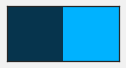

In [45]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

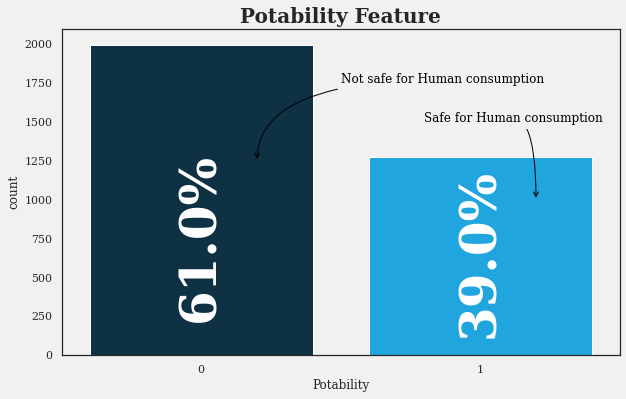

In [46]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

#### checking normality

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

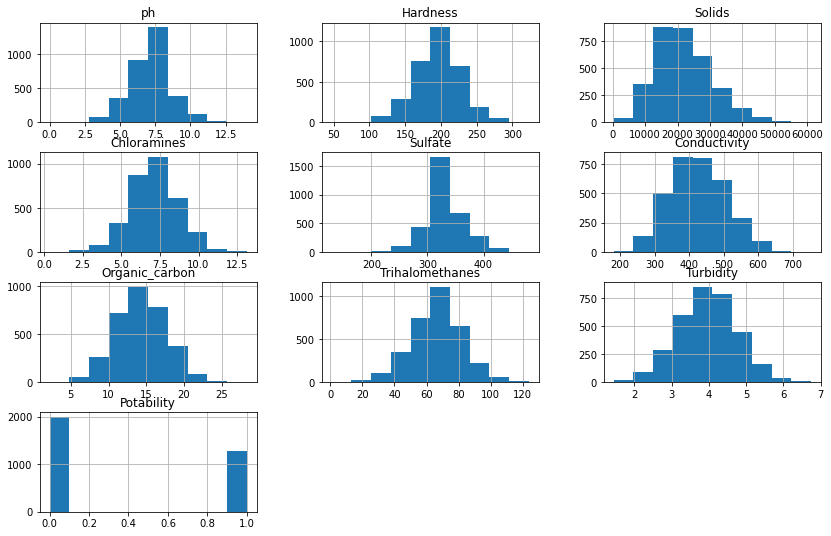

In [34]:
df.hist(figsize=(14,9))

All the data is good .no feature is biased

No need to do normalization because the data is not skewed

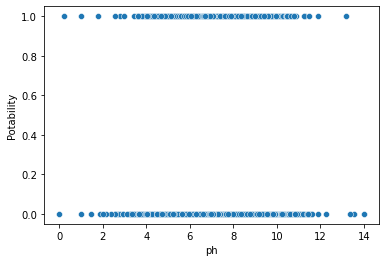

In [37]:
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()

In [41]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [48]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


#### Multivariate Analysis

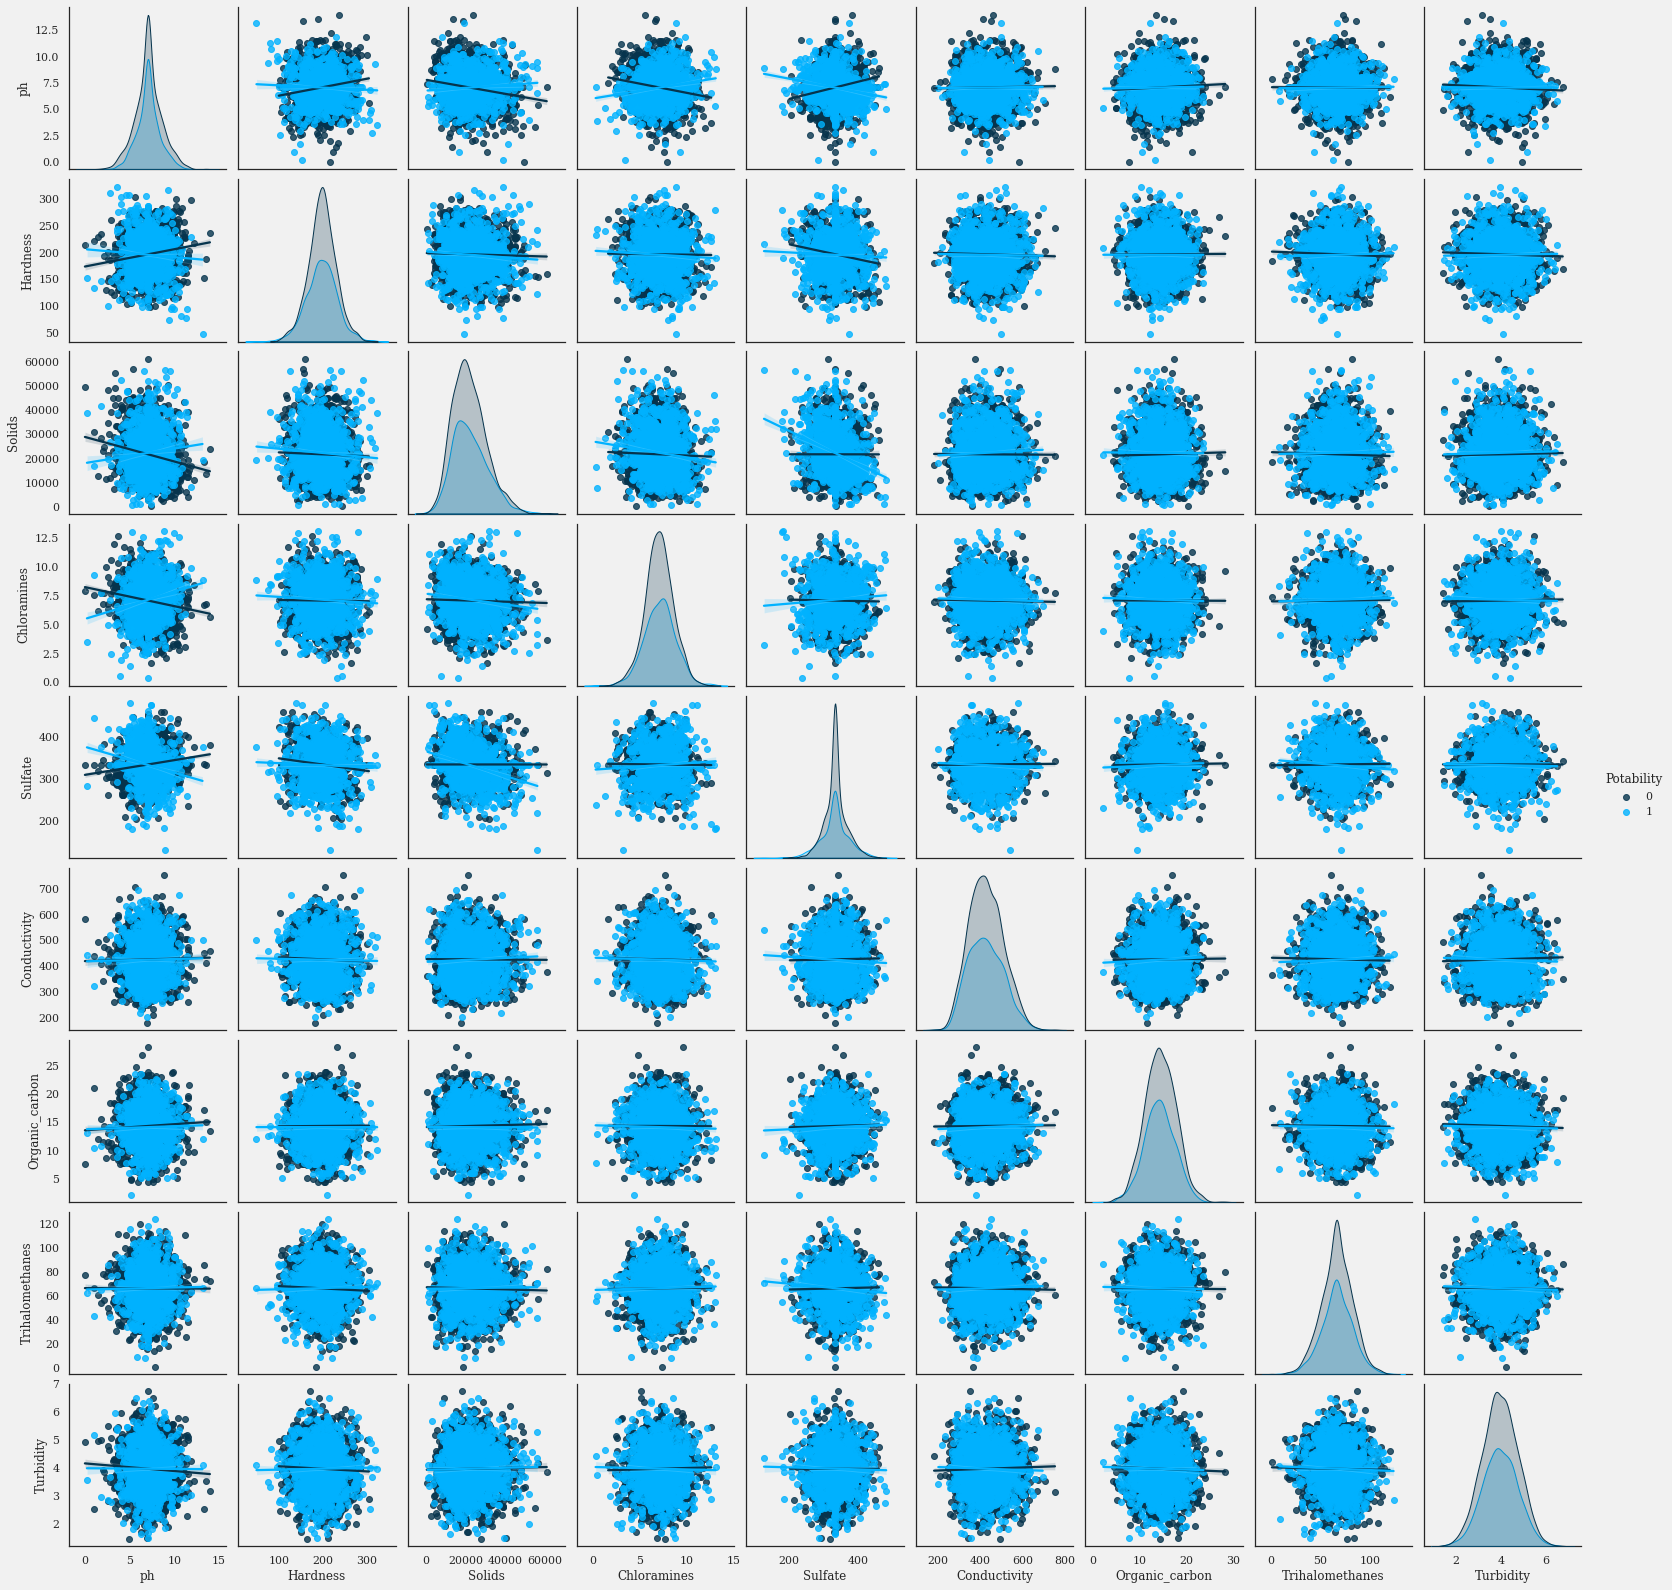

In [52]:
sns.pairplot(df, hue='Potability', kind='reg')

<AxesSubplot:>

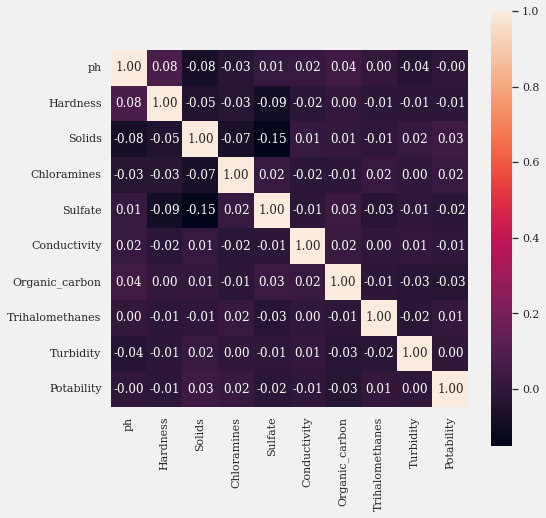

In [53]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models.

### Partitioning

In [54]:
x = df.drop('Potability',axis=1) #input data

In [61]:
y = df['Potability']

In [62]:
from sklearn.model_selection import train_test_split

In [99]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.1,shuffle=True,random_state=None)

### Model Training

Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [101]:
dtc.fit(x_train,y_train) # model training 

DecisionTreeClassifier()

In [102]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2649,5.735359,149.171690,28628.151856,5.073074,333.775777,465.554894,12.201950,65.909850,4.085055
914,5.791154,190.431679,20288.235569,6.298366,347.041020,544.857481,17.706838,84.388191,4.104835
144,4.965774,220.848639,21802.744898,6.250578,311.598136,386.413332,18.035238,53.908177,3.421767
1865,8.822610,216.432576,27109.239652,7.322163,333.775777,384.018547,15.955491,78.828883,4.415596
261,4.815767,217.687093,16392.135069,7.461170,278.742296,481.480828,15.517296,77.693374,4.375224
...,...,...,...,...,...,...,...,...,...
593,6.297846,214.214574,21022.835030,7.258722,331.821977,434.048702,15.872182,64.846905,1.680554
2155,4.981672,220.950558,20988.087806,7.985668,232.548814,373.624878,12.235175,45.950030,4.475148
1783,7.080795,149.042846,27687.737646,8.660711,284.945759,288.517697,15.736642,62.757307,3.771305
1661,6.791097,209.128163,20149.179673,5.804000,288.356856,291.304212,12.327335,57.303577,3.084040


In [103]:
y_test # ground truth

2649    0
914     0
144     0
1865    0
261     1
       ..
593     0
2155    0
1783    0
1661    0
325     1
Name: Potability, Length: 328, dtype: int64

In [104]:
y_prediction=dtc.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [106]:
accuracy_score(y_prediction,y_test)

0.5975609756097561

In [107]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
mod = []
cv_score=[]

model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(),
        DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]

for m in model:
    cv_score.append(cross_val_score(m, x_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
    
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
5,KNeighborsClassifier(),0.548186
4,ExtraTreeClassifier(),0.567843
3,DecisionTreeClassifier(),0.592931
0,AdaBoostClassifier(),0.616009
1,BaggingClassifier(),0.654343
2,GradientBoostingClassifier(),0.656715


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models. 

Gradient Boosting

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       204
           1       0.57      0.31      0.40       124

    accuracy                           0.65       328
   macro avg       0.62      0.58      0.58       328
weighted avg       0.63      0.65      0.62       328



<AxesSubplot:>

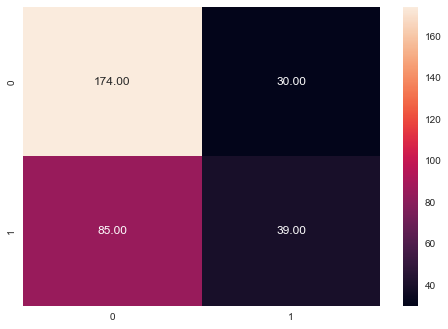

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


I hope this is good model for initial analysis. further fine tuning and outlier handling might help for more accuracy. 